# <center>Lending Club Analysis</center>

The Lending Club analysis is divided into four main parts:
1. Data understanding 
2. Data Cleaning and Manipulation
3. Data Analysis 
4. Presentation and Recommendations 

## 1. Data understanding

###### Step1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

#Enable display of complete dataframe
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

###### Step 2: Read the data

In [2]:
loan_data = pd.read_csv("loan.csv",low_memory=False, sep=",")

###### Step 3: Data information

In [3]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4]:
#find the number of rows and columns in the dataset.
loan_data.shape

(39717, 111)

In [5]:
#Find column names
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
# Get fist 5 rows of dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
#discribe the data
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

## Data cleaning

###### Step 4: Check for duplicate rows in dataset based on id column

In [8]:
print(loan_data.duplicated(subset=None, keep='first').count())
duplicate=loan_data[loan_data.duplicated(['id'])]
duplicate

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


**Inference**: No duplicate rows

###### Step 5: Check empty rows and columns

In [9]:
print('Number of empty Rows:')
print(loan_data.isnull().all(axis=1).sum())


print('Number of empty Columns:')
print(loan_data.isnull().all(axis=0).sum())

Number of empty Rows:
0
Number of empty Columns:
54


**Inference**: There are 54 columns have all missing values.

###### Step 6: Find columns have all null values

In [10]:
percent_missing = loan_data.isnull().sum() * 100 / len(loan_data)
missing_value_df = pd.DataFrame({'column_name': loan_data.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)
(missing_value_df['percent_missing'] == 100.00).sum()

54

**Inference**: 54 columns have all NULL values

In [11]:
# List of columns having NULL values
missing_values_columns = missing_value_df[(missing_value_df['percent_missing'] > 90)].column_name.tolist()
missing_values_columns

['mths_since_last_record',
 'next_pymnt_d',
 'num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths'

###### Step 7: Dropping columns having all missing values

In [12]:
# Dropping columns having all missing values
loan_data = loan_data.drop(missing_values_columns, axis=1)
loan_data.shape

(39717, 55)

###### Step 8: Find columns with null values again

In [13]:
100*(loan_data.isnull().sum()/len(loan_data.index)).sort_values(ascending=False)

mths_since_last_delinq       64.66
desc                         32.58
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
total_acc                     0.00
total_pymnt_inv               0.00
recoveries                    0.00
total_rec_prncp               0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
pub_rec                       0.00
collection_recovery_fee       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt         

**Inference**: mths_since_last_delinq and desc columns have 64.66% and 32.58% null values

###### Step 9: Drop mths_since_last_delinq and desc columns

In [14]:
loan_data = loan_data.drop(['desc', 'mths_since_last_delinq'], axis=1)
loan_data.shape

(39717, 53)

###### Step 10: Find and drop columns with all zero values

In [15]:
for column in loan_data.columns:
    if (loan_data[column]==0).all() :
        print(column) 

acc_now_delinq
delinq_amnt


In [16]:
loan_data=loan_data.drop(['acc_now_delinq', 'delinq_amnt'], axis=1)
loan_data.shape

(39717, 51)

###### Step 11: Find and drop columns with all NA and zeros only

In [17]:
#find columns which contains zeors and na
total_na = loan_data.isna().sum()
total_zeros = loan_data.isin([0]).sum(axis=0)

#Check total no. na's and zeros is equal to total number of rows
Check = loan_data.shape[0] == total_na+total_zeros

column = pd. concat([total_zeros,total_na,Check],axis=1)
column.rename(columns={0:'Zero',1:'NA',2:'Is Equal'},inplace=True)
column.sort_values(by='Is Equal', ascending=False).T

,tax_liens,chargeoff_within_12_mths,collections_12_mths_ex_med,total_rec_prncp,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_late_fee,total_rec_int,inq_last_6mths,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,open_acc,id,member_id,home_ownership,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,delinq_2yrs,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line
Zero,39678,39661,39661,74,37601,994,0,0,0,38577,38577,16,165,37671,71,19300,35499,35935,0,74,0,0,0,37339,0,0,0,0,0,0,129,0,0,0,0,0,0,0,0,35405,0,0,0,0,0,0,0,0,0,183,0
NA,39,56,56,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,71,0,2,0,0,697,0,0,0,0,0,0,0,0,0,0,0,0,2459,1075,0,0,0,0,0,0,0,0,11,0,0,0,0
Is Equal,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Obervation: collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens contains zeros and na's

In [18]:
loan_data=loan_data.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1)
loan_data.shape

(39717, 48)

###### Step 12: Find and drop  the columns which have one value for all rows.

In [19]:
unique_data=[]
for row in loan_data.columns.tolist():
    unique_data.append({'column': row, 'count': len(loan_data[row].unique())})

unique = pd.DataFrame(unique_data).sort_values('count')
unique.T

,17,45,32,46,5,14,16,47,12,28,8,26,24,11,19,9,27,22,15,31,42,44,6,25,21,2,3,30,33,34,39,41,23,40,13,37,4,7,20,29,10,43,38,36,35,18,1,0
column,pymnt_plan,policy_code,initial_list_status,application_type,term,verification_status,loan_status,pub_rec_bankruptcies,home_ownership,pub_rec,grade,inq_last_6mths,delinq_2yrs,emp_length,purpose,sub_grade,open_acc,addr_state,issue_d,total_acc,last_pymnt_d,last_credit_pull_d,int_rate,earliest_cr_line,zip_code,loan_amnt,funded_amnt,revol_util,out_prncp,out_prncp_inv,total_rec_late_fee,collection_recovery_fee,dti,recoveries,annual_inc,total_rec_prncp,funded_amnt_inv,installment,title,revol_bal,emp_title,last_pymnt_amnt,total_rec_int,total_pymnt_inv,total_pymnt,url,member_id,id
count,1,1,1,1,2,3,3,4,5,5,7,9,11,12,14,35,40,50,55,82,102,107,371,526,823,885,1041,1090,1137,1138,1356,2616,2868,4040,5318,7976,8205,15383,19616,21711,28821,34930,35148,37518,37850,39717,39717,39717


**Inference**: Columns pymnt_plan, policy_code, initial_list_status, application_type have one value.

In [20]:
loan_data=loan_data.drop(['pymnt_plan', 'policy_code', 'initial_list_status','application_type'], axis=1)
loan_data.shape

(39717, 44)

###### Step 13: Find the column with incorrect datatype

In [21]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

**Inference**: term, int_rate, emp_length, revol_util, issue_d have object data type are object

###### Step 14: Convert term, int_rate columns into int and float

In [22]:
loan_data['term'] = loan_data['term'].apply(lambda x: pd.to_numeric(x.split(" months")[0]))
loan_data.dtypes['term']

dtype('int64')

In [23]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_data.dtypes['int_rate']

dtype('float64')

###### Step 15: Standardise emp_length column be removing the extra text "years" and assigning appropriate values as mention in data dictionary.
"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years."


In [24]:
loan_data = loan_data[~loan_data['emp_length'].isnull()]

loan_data['emp_length'] = loan_data['emp_length'].str.rstrip(' years')
loan_data['emp_length'].replace({'10+': '10'}, inplace=True)
loan_data['emp_length'][loan_data['emp_length'] == '< 1'] = '0'
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))
loan_data.head()

C:\Users\Prachi\AppData\Local\Temp\ipykernel_24076\2294395549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['emp_length'][loan_data['emp_length'] == '< 1'] = '0'


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,"4,975.00",36,10.65,162.87,B,B2,NaN,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,"2,500.00",60,15.27,59.83,C,C4,Ryder,0,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,"2,400.00",36,15.96,84.33,C,C5,NaN,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,"10,000.00",36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,"3,000.00",60,12.69,67.79,B,B5,University Medical Group,1,RENT,"80,000.00",Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [25]:
loan_data.dtypes['emp_length']

dtype('int64')

###### Step 16: Convert revol_util into float and remove % sign

In [26]:
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip("%").astype(float)
loan_data.dtypes['revol_util']

dtype('float64')

## Data Analysis

###### Step 16: Remove post loan approval columns

It is important to consider the "Dimensions"and "Measures"in the given dataset.

Dimensions are qualitative values and they are termed as categorical values. In given dataset age, occupation, employment details etc. are dimensions are the dimensions which help in data analysis.

Measures are quantitative values. In given dataset amount of loan, interest rate, purpose of loan etc. are the measures which help in data analysis.

There are some values which will be generated when loan is approved like delinquent 2 years, revolving balance, next payment date etc. These values are not present at the time of loan approval, hence the are not useful for loan approval process. 

So keep dimensions and measures and remove all other columns.

In [27]:
#list post load approval generated column by referring to Data Dictionary.xlsx
post_approval_var=["collection_recovery_fee","delinq_2yrs","earliest_cr_line","inq_last_6mths",
                   "last_credit_pull_d","last_pymnt_amnt","last_pymnt_d","open_acc","out_prncp","out_prncp_inv",
                   "pub_rec","recoveries","revol_bal","revol_util","total_acc","total_pymnt","total_pymnt_inv",
                   "total_rec_int","total_rec_late_fee","total_rec_prncp"]
post_approval_var

['collection_recovery_fee',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp']

In [28]:
loan_data = loan_data.drop(post_approval_var, axis=1)
loan_data.shape

(38642, 24)

###### Step 17: Updated column datatype to float for columns loan_amnt, funded_amnt,funded_amnt_inv, installment, annual_inc

In [29]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc']
loan_data[columns] = loan_data[columns].astype(np.float64)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  float64
 3   funded_amnt           38642 non-null  float64
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  int64  
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d            

###### Step 18: Find the types of loan_status and filter the required loan_status

In [30]:
loan_data["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

**Inference**: "Current" type of loan is neither fully paid nor defaulted. So Remove current loan status as it's not needed in the analysis

In [31]:
# filtering only fully paid or charged-off
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

**Remark:** After this step "Fully Paid" will be equal to 0 and "Charged Off" loans will be equal to 1.

###### Step 19: Outlier Treatment for annual_inc

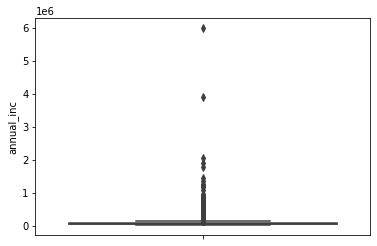

In [32]:
sns.boxplot(y=loan_data['annual_inc'])
plt.show()

**Inference:** Plot shows the presence of outliers.
- Remove outliers.
- Let's see the quantile info and take an appropriate action.

In [33]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    60,000.00
0.75    83,000.00
0.90   116,672.40
0.95   142,000.00
0.97   166,213.00
0.98   189,996.00
0.99   235,000.00
Name: annual_inc, dtype: float64

**Inference:** The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation. So, considering threshold for removing outliers as 0.95

In [34]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

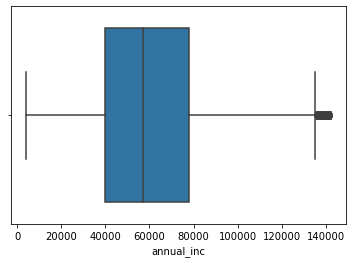

In [35]:
sns.boxplot(x=loan_data.annual_inc)
plt.show()

###### Step 20: Analyze other numerical variables dti, loan_amnt,funded_amnt_inv which could possibly have outliers.

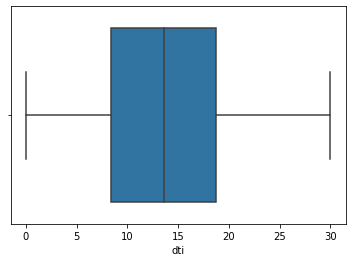

In [36]:
sns.boxplot(x=loan_data.dti)
plt.show()

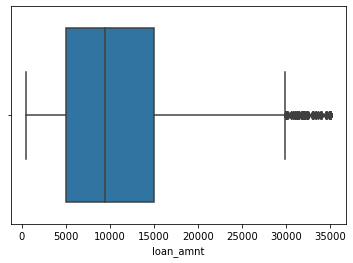

In [37]:
sns.boxplot(x=loan_data.loan_amnt)
plt.show()

In [38]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.75   15,000.00
0.90   20,000.00
0.95   25,000.00
0.97   25,795.00
0.97   28,000.00
0.98   30,000.00
0.99   35,000.00
1.00   35,000.00
Name: loan_amnt, dtype: float64

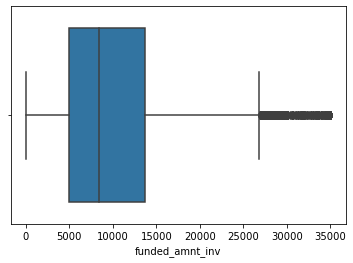

In [39]:
sns.boxplot(x = loan_data.funded_amnt_inv)
plt.show()

In [40]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.50    8,412.21
0.75   13,750.00
0.90   19,770.81
0.95   23,950.05
0.97   24,975.00
0.97   25,473.16
0.98   27,975.00
0.98   29,950.00
0.99   31,981.50
1.00   35,000.00
Name: funded_amnt_inv, dtype: float64

**Inference:** As the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

###### Step 21: Analyze loan_amnt

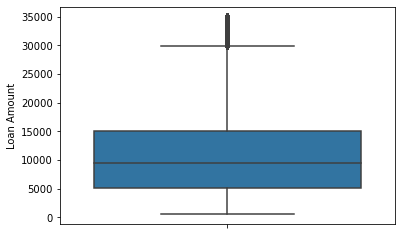

In [41]:
sns.boxplot( y=loan_data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

**Inference**: The loan amount varies from 0 to 35,000 having mean of 10,000

###### Step 22: Analyze data loan_status wise

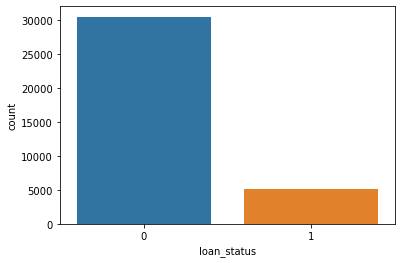

In [42]:
sns.countplot(x= loan_data["loan_status"])
plt.show()

**Inference:** 
1. Most of the loans are Fully Paid. 
2. About 14% of loan are having status as defaulters.
3. We have a class imbalance here.

###### Step 23: Analyze grade wise data

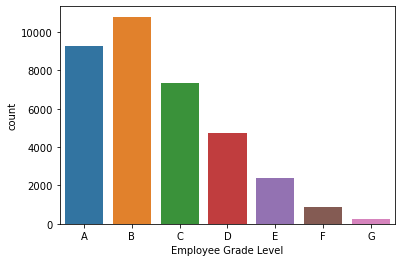

In [43]:
sns.countplot(x='grade', data=loan_data, order = sorted(loan_data["grade"].unique()))
plt.xlabel('Employee Grade Level')
plt.show()

**Inference:** Most of the loans have grade of A and B. 

###### Step 24: Analyze Employee Working Experience wise data

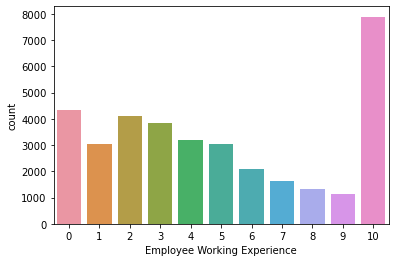

In [44]:
sns.countplot(x='emp_length', data=loan_data)
plt.xlabel('Employee Working Experience')
plt.show()

**Inference:** Majority of employees applying for the loan have more than 10 years of experience

###### Step 25: Analyze total funded amount wise data

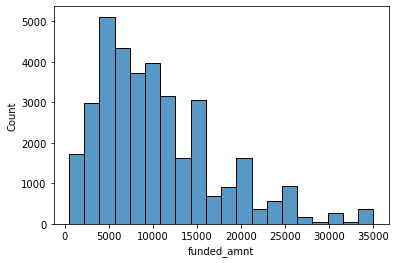

In [45]:
sns.histplot(loan_data['funded_amnt'],bins=20)
plt.show()

**Inference:** Funded amount is left skewed. Most of the loan amount given is 5 hundred thousand.

###### Step 26: Analyzing installment,dti, loan_amnt 

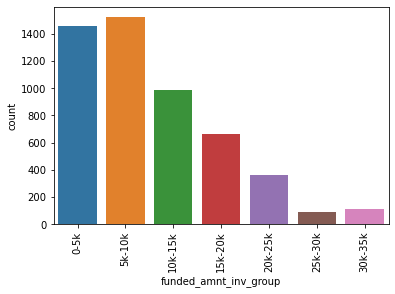

In [46]:
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
plt.xticks(rotation=90)
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Mostly funded amount  is between 5000-10000

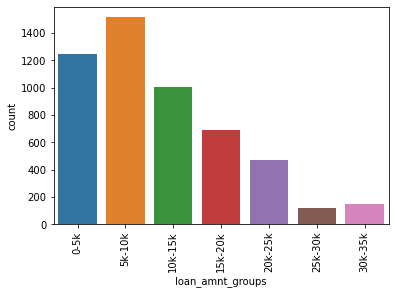

In [47]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.xticks(rotation=90)
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:**Mostly the Loan amount is between 5429 - 10357

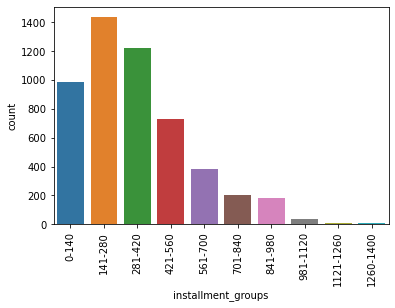

In [48]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['0-140','141-280','281-420','421-560','561-700','701-840','841-980','981-1120','1121-1260','1260-1400'])
plt.xticks(rotation=90)
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Most of the monthly installments are between 140-240

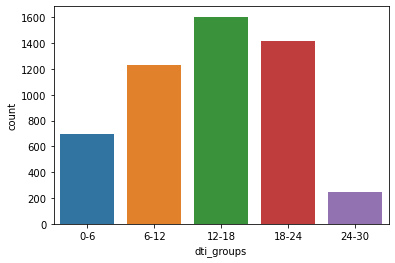

In [49]:
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Most of the defaults are at Dti is between 12-18

###### Step 26: Compare default rate across grade of loan_status 

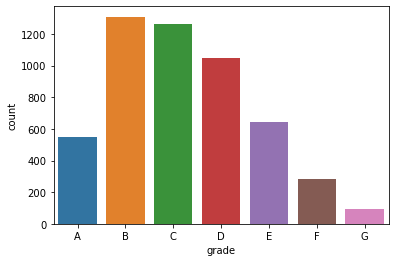

In [50]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 1], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

**Inference:** Most of the defaulters are at grade B level

###### Step 27: Compare default rates across sub-grade of loan_status 

In [51]:
loan_data.sub_grade.head()

0    B2
1    C4
2    C5
3    C1
5    A4
Name: sub_grade, dtype: object

In [52]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

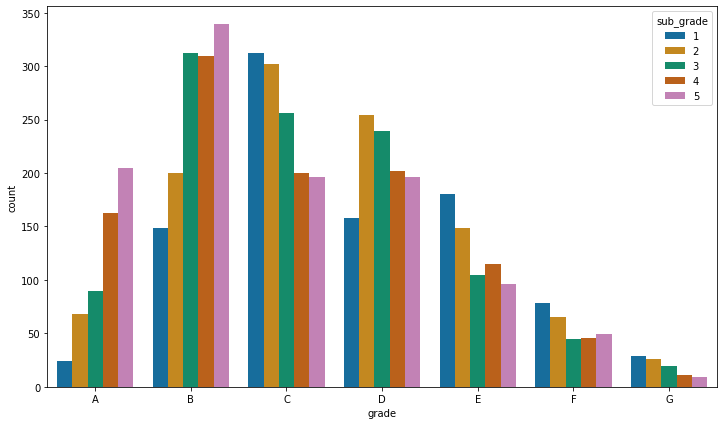

In [53]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 1])
plt.show()

**Inference:** Most defaults are at 'B5' level

###### Step 28: Term-wise loan default

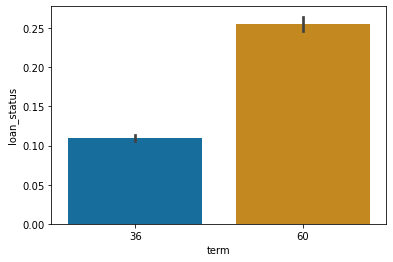

In [54]:
sns.barplot(x='term', y='loan_status', data=loan_data)
plt.show()

**Inference:** 60 month loan default count is more than 36 months loan default

###### Step 30: Analyzing defaults by issued month and year

In [55]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,funded_amnt_inv_group,loan_amnt_groups,installment_groups,dti_groups,issue_month,issue_year
0,1077501,1296599,"5,000.00","5,000.00","4,975.00",36,10.65,162.87,B,2,NaN,10,RENT,"24,000.00",Verified,Dec-11,0,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.00,0-5k,0-5k,141-280,24-30,Dec,2011
1,1077430,1314167,"2,500.00","2,500.00","2,500.00",60,15.27,59.83,C,4,Ryder,0,RENT,"30,000.00",Source Verified,Dec-11,1,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.00,0-5k,0-5k,0-140,0-6,Dec,2011
2,1077175,1313524,"2,400.00","2,400.00","2,400.00",36,15.96,84.33,C,5,NaN,10,RENT,"12,252.00",Not Verified,Dec-11,0,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.00,0-5k,0-5k,0-140,6-12,Dec,2011
3,1076863,1277178,"10,000.00","10,000.00","10,000.00",36,13.49,339.31,C,1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,Dec-11,0,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,0.00,5k-10k,5k-10k,281-420,18-24,Dec,2011
5,1075269,1311441,"5,000.00","5,000.00","5,000.00",36,7.90,156.46,A,4,Veolia Transportaton,3,RENT,"36,000.00",Source Verified,Dec-11,0,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.00,0-5k,0-5k,141-280,6-12,Dec,2011


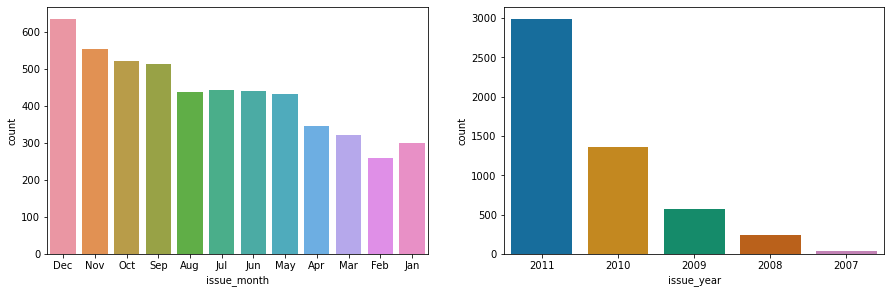

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']==1])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

###### Step 31:  Analyzing default by home_ownership

In [57]:
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [58]:
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

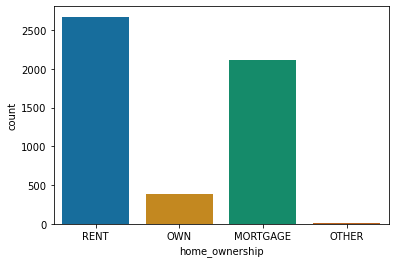

In [59]:
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Maximum number of default have "Rental" home ownership

###### Step 32: Analyzing default by purpose of loan

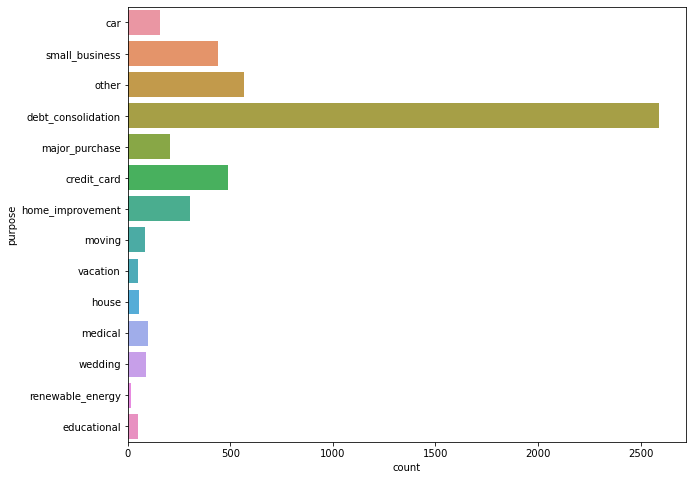

In [60]:
plt.subplots(figsize = (10,8))
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 1])
plt.show()

**Inference:** Maximum number of defaults are with the purpose of 'debt_consolidation'.

###### Step 33: Analyzing defaults with respect to the interest rate 

[]

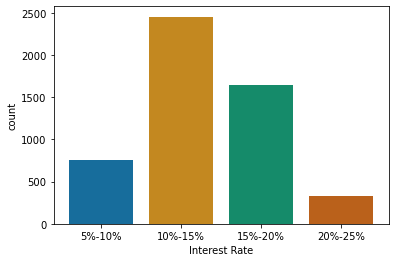

In [61]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 1])
plt.xlabel('Interest Rate')
plt.plot()

**Inference:** Most number of defaults are the applicants who receive interest at the rate of 10-15%

###### Step 34: Analyzing defaults with respect to the annual income

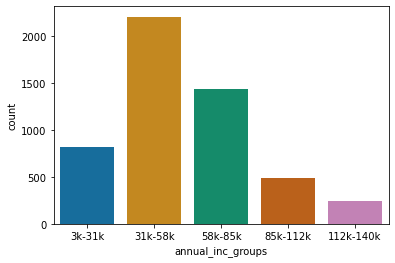

In [62]:
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 1])
plt.show()

**Inference:** Most number of defaults are the applicants whose annual income is in between 31 to 58K.

###### Step 35: Analyzing defaults against the term duration

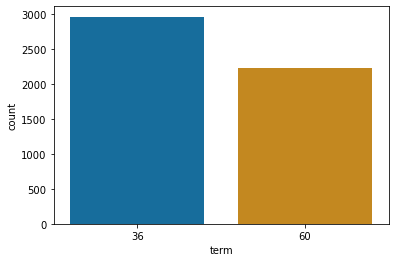

In [63]:
sns.countplot(x='term', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Most number of defaults are the applicants whose loan term is 36 months

###### Step 36: Analyzing defaults against the verification status

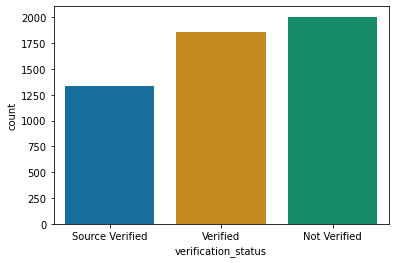

In [64]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']==1])
plt.show()

**Inference:** Most number of defaults are the applicants whose verification status is " Not verified"

###### Step 36: Analyzing Annual income vs loan purpose

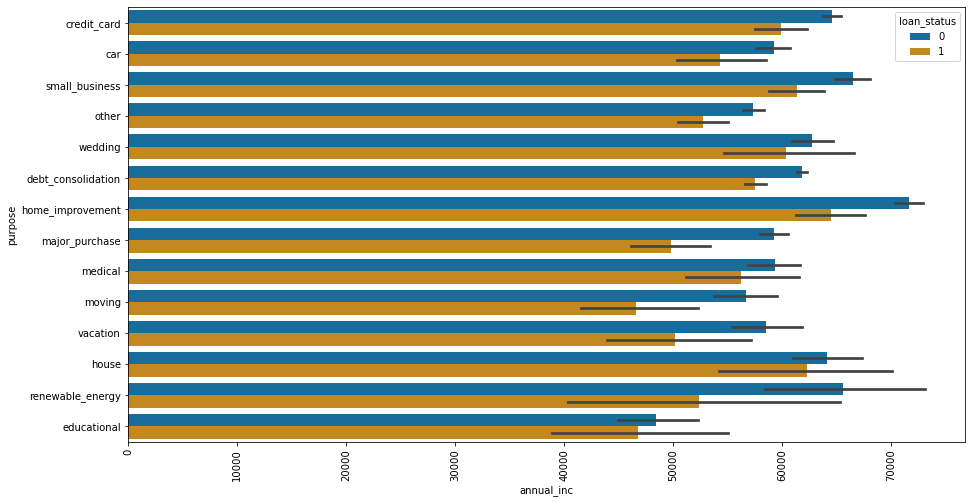

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="colorblind")
plt.xticks(rotation=90)
plt.show()

**Inference:** Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"
Applicants taking loan for 'home improvement' and have income of 60k -70k

###### Step 37: Analyzing Annual income vs home ownership

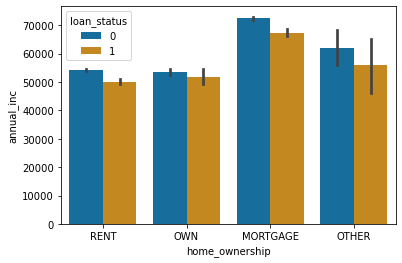

In [66]:
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.show()

**Inference:** Applicants whose home ownership is 'MORTGAGE' and have income of 60-70k

###### Step 38:Analizing Loan vs House Ownership

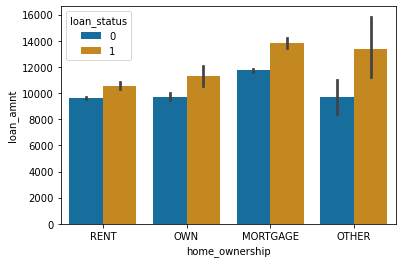

In [67]:
sns.barplot(data =loan_data,y='loan_amnt', x='home_ownership', hue ='loan_status',palette="colorblind")
plt.show()

###### Step 39: Find the correlation between the data

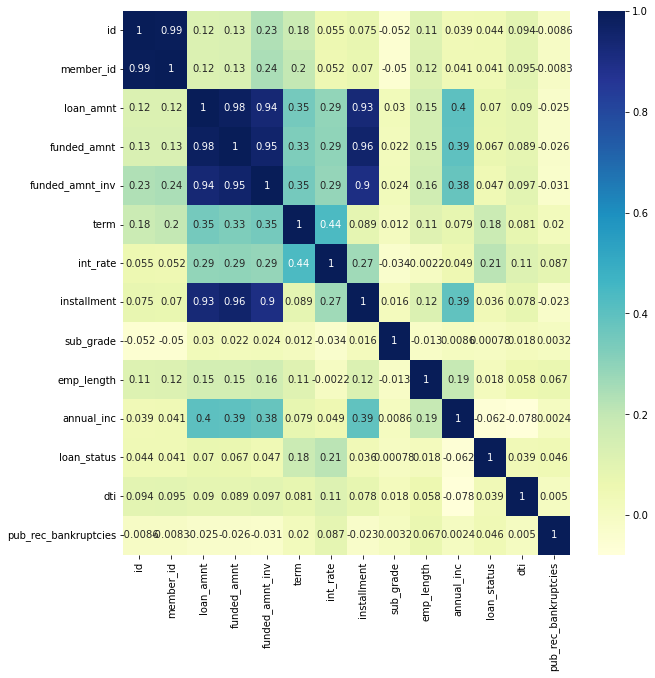

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(), cmap="YlGnBu",linecolor='black',annot=True)
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

###### Step 40: Finding defaults against address of applicants

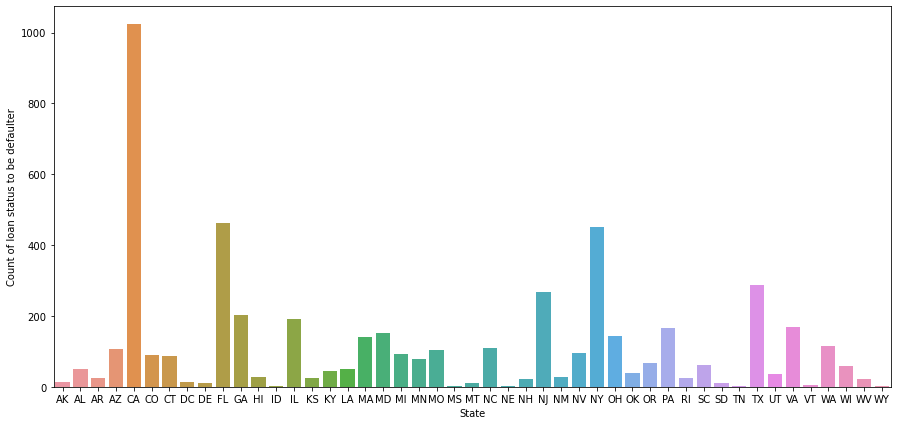

In [69]:
g = loan_data[loan_data['loan_status']==1].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='addr_state', y='loan_status', data=g)
plt.ylabel('Count of loan status to be defaulter')
plt.xlabel('State')
plt.show()

**Inference:** Applicants from the state CA are having high probability to be default